# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In the Materials and Methods section of the supporting research paper to this data, we are informed that the data reflects 17 marketing campaigns that were carried out from May 2008 through November 2010. During the campaigns, the bank contacted a total of 79,354 potential customers.

The campaign was mostly telemarketing, in which the bank representatives called prospective customers and tried to convince them to subscribe to the long-term deposit product. Each contact attempt was registered with a set of attributes, which include:

- Personal Data: Job, age, marital status, education level.
- Financial Status: Personal and housing loans, balance.
- Communication Details: Call duration, contact day/month, type of communication (telephone/cellular).
- Prior Campaign Activity: Number of previous interactions, number of days since previous interaction.
- Campaign Result: Did the customer enroll for the deposit (yes/no)?.

**Success Rate and Major Implications**

Of 79,354 contacts in total, the long-term deposit was subscribed by merely 6,499 customers.
This leaves an overall success rate of 8%, and 92% of contacts remaining unsubscribed. The data indicates that the success of the campaigns was not high, with the need for improved targeting.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [112]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [113]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [114]:
#Check for missing Values
missing_values = df.isnull().sum()

print('Missing Values: ', missing_values)

Missing Values:  age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [115]:
#Checking datatype in columns
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

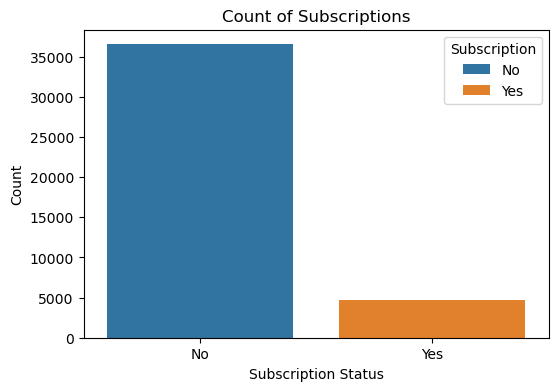

In [116]:
# Countplot for target variable 'y'

plt.figure(figsize=(6,4))
sns.countplot(x=df['y'], hue=df['y'])  # Using hue to differentiate classes
plt.title("Count of Subscriptions")
plt.xlabel("Subscription Status")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.legend(title="Subscription", labels=["No", "Yes"])
plt.show()

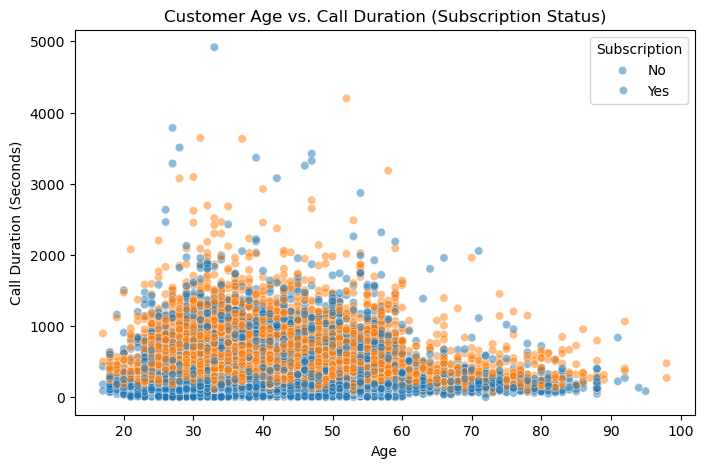

In [117]:
# Scatter plot for Age vs Call Duration with Subscription Status

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["age"], y=df["duration"], hue=df["y"], alpha=0.5)
plt.title("Customer Age vs. Call Duration (Subscription Status)")
plt.xlabel("Age")
plt.ylabel("Call Duration (Seconds)")
plt.legend(title="Subscription", labels=["No", "Yes"])
plt.show()

### Observations from the Graphs:
   - More people did not subscribe than those who did.
   - This confirms a class imbalance, which could affect model performance.
   - Longer call durations seem to have a higher likelihood of subscription.
   - Most short calls (low duration)** result in no subscription.
   - Age does not have a strong direct effect, but call duration matters.

### Implications:
- The bank may prioritize longer conversations, as they seem more effective.
- The model should weigh call duration more when making predictions.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective

The objective of this project is to predict if a client will subscribe to a long-term deposit from his or her personal, financial, and marketing campaign information.

By proper classification of potential subscribers, the bank can: 
- Optimize marketing activities.
- Prevent unwanted calls to uninterested customers.
- Increase campaign performance and conversion rates.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [119]:
# Selecting Features to work with
selected_features = ['education', 'contact', 'month', 'day_of_week', 'job', 'marital', 'poutcome']
target_column = 'y'

# Define feature matrix (X) and target variable (y)
X = df[selected_features]
y = df[target_column]

# Display first 10 rows of the selected features
X.head(10)

,education,contact,month,day_of_week,job,marital,poutcome
0,basic.4y,telephone,may,mon,housemaid,married,nonexistent
1,high.school,telephone,may,mon,services,married,nonexistent
2,high.school,telephone,may,mon,services,married,nonexistent
3,basic.6y,telephone,may,mon,admin.,married,nonexistent
4,high.school,telephone,may,mon,services,married,nonexistent
5,basic.9y,telephone,may,mon,services,married,nonexistent
6,professional.course,telephone,may,mon,admin.,married,nonexistent
7,unknown,telephone,may,mon,blue-collar,married,nonexistent
8,professional.course,telephone,may,mon,technician,single,nonexistent
9,high.school,telephone,may,mon,services,single,nonexistent


In [120]:
# Find unique values in each categorical feature
for column in X.columns:
    print(f"{column}: {X[column].nunique()} unique values")
    print(X[column].value_counts(), "\n")

#Shows value counts to understand the distribution before encoding.

education: 8 unique values
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64 

contact: 2 unique values
contact
cellular     26144
telephone    15044
Name: count, dtype: int64 

month: 10 unique values
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64 

day_of_week: 5 unique values
day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64 

job: 12 unique values
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown 

In [121]:
# Select categorical features for encoding (only bank-related information)
OHEncoder_features = ['job', 'marital', 'education', 'default', 'contact']
OEncoder_features = ['housing', 'loan']

target_column = 'y'

# Define feature matrix (X) and target variable (y)
X = df[bank_features]
y = df[target_column]

# Apply OneHotEncoding and OrdinalEncoder to categorical features
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                        ['job', 'marital', 'education','default','contact']), (OrdinalEncoder(), ['housing','loan']), remainder='passthrough')

# Fit and transform the features
column_trans.fit(X)


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'default',
                                  'contact']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['housing', 'loan'])])

In [122]:
# Initialize LabelEncoder for the target column
le = LabelEncoder()

# Encode the target variable
y_encoded = le.fit_transform(y)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [124]:
# Starting Dummy Classifier that will predict the most frequent class
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Predict on the test set
dummy_pred = dummy_clf.predict(X_test)

# Evaluate performance using accuracy, precision, recall, and F1-score
dummy_accuracy = accuracy_score(y_test, dummy_pred)
dummy_precision = precision_score(y_test, dummy_pred, average="macro", zero_division=1)
dummy_recall = recall_score(y_test, dummy_pred, average="macro", zero_division=1)
dummy_f1 = f1_score(y_test, dummy_pred, average="macro")

print(f"Baseline Accuracy: {dummy_accuracy:.6f}")
print(f"Baseline Precision: {dummy_precision:.6f}")
print(f"Baseline Recall: {dummy_recall:.6f}")
print(f"Baseline F1-score: {dummy_f1:.6f}")

Baseline Accuracy: 0.886502
Baseline Precision: 0.943251
Baseline Recall: 0.500000
Baseline F1-score: 0.469918


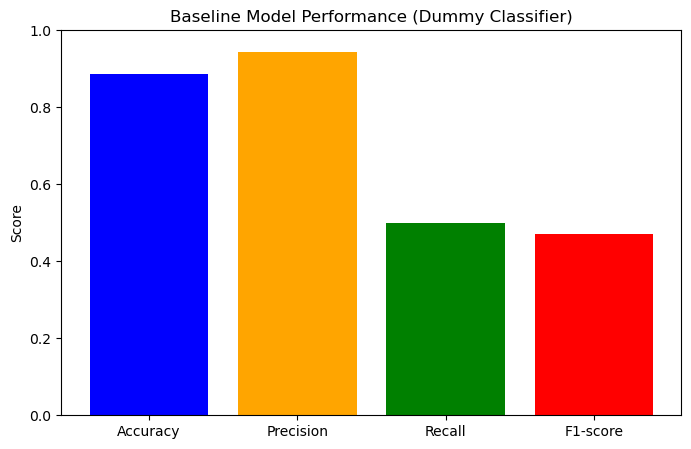

In [125]:
# Visualization
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
scores = [dummy_accuracy, dummy_precision, dummy_recall, dummy_f1]

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(metrics, scores, color=["blue", "orange", "green", "red"])
plt.ylim(0, 1)  # Scores range between 0 and 1
plt.ylabel("Score")
plt.title("Baseline Model Performance (Dummy Classifier)")

plt.show()

In [126]:
# Store the results
performance_matrix = np.array([[dummy_accuracy, dummy_precision],
                               [dummy_recall, dummy_f1]])

# Labels for heatmap
metric_labels = ["Accuracy", "Precision", "Recall", "F1-score"]
performance_df = pd.DataFrame(performance_matrix,
                              index=["Row 1", "Row 2"],
                              columns=metric_labels[:2])

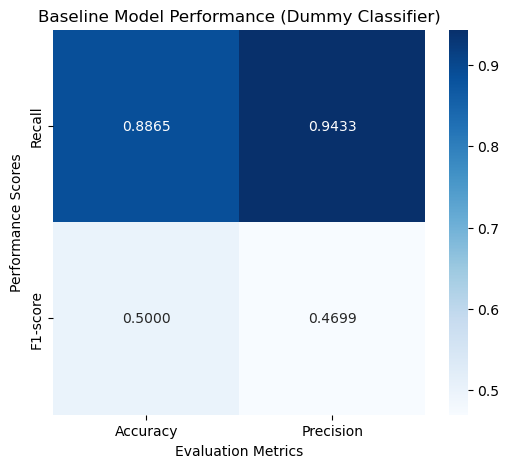

In [127]:
# Visualization #2
plt.figure(figsize=(6,5))
sns.heatmap(performance_matrix, annot=True, fmt=".4f", cmap="Blues", xticklabels=metric_labels[:2], yticklabels=metric_labels[2:])
plt.title("Baseline Model Performance (Dummy Classifier)")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Performance Scores")
plt.show()

The heatmap presentation provides us with an organized picture of the Dummy Classifier performance that we can contrast with. The following is what we can observe:

- **Low prediction ability**: As the Dummy Classifier only predicts the most frequent class, precision, recall, and F1-score are not ideal, which makes the argument stronger for a more superior model.
- **High accuracy, but misleading**: The model's accuracy appears high, but only because the overwhelming majority of customers don't subscribe, so predicting "No" most frequently artificially enhances accuracy without true value as a prediction.
- **The need for true modeling**: A good classifier should improve recall and precision so that true subscribers are classified accurately rather than performing frequency-based predictions.

This baseline exists to give our classification models at least a minimum baseline, ensuring that our subsequent methods significantly do better than a naive prediction strategy.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [128]:

# Print available columns in X_train
print("Columns in X_train:", X_train.columns.tolist())

# Print missing columns if any
expected_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'age', 'campaign', 'pdays', 'previous']
missing_columns = [col for col in expected_columns if col not in X_train.columns]
print("Missing columns:", missing_columns)

# Encountered feature issues so need to select them dynamically based on columns that are present
categorical_features = list(set(X_train.select_dtypes(include=['object']).columns))
numerical_features = list(set(X_train.select_dtypes(include=['int64', 'float64']).columns))

# Define transformations
column_trans = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])


Columns in X_train: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
Missing columns: ['age', 'campaign', 'pdays', 'previous']


In [129]:
# Building a KNN Pipeline
knn_pipe = Pipeline([('preprocessor', column_trans),
                     ('model', KNeighborsClassifier(n_neighbors =5))])

In [130]:
# Training
knn_pipe.fit(X_train, y_train)

# Predict test set
y_pred_knn = knn_pipe.predict(X_test)

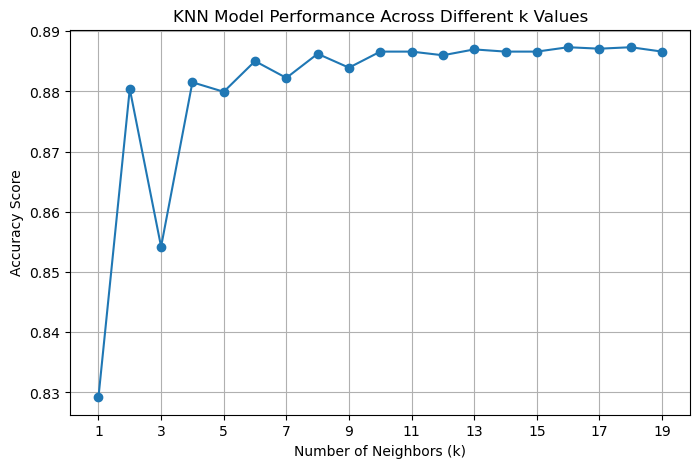

In [131]:
# Evaluate KNN performance for different k-values

k_values = range(1, 20)

accuracy_scores = []

for k in k_values:
    knn = Pipeline([
        ('preprocessor', column_trans),
        ('model', KNeighborsClassifier(n_neighbors=k))
    ])
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# Plot acc. vs K-Values
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("KNN Model Performance Across Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.xticks(np.arange(1, 20, step=2))
plt.grid(True)
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

In [132]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average="macro", zero_division=1)
knn_recall = recall_score(y_test, y_pred_knn, average="macro", zero_division=1)
knn_f1 = f1_score(y_test, y_pred_knn, average="macro")

# Print results
print(f"KNN Model Accuracy: {knn_accuracy:.6f}")
print(f"KNN Precision: {knn_precision:.6f}")
print(f"KNN Recall: {knn_recall:.6f}")
print(f"KNN F1-score: {knn_f1:.6f}")

KNN Model Accuracy: 0.879947
KNN Precision: 0.625872
KNN Recall: 0.528477
KNN F1-score: 0.529007


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [133]:
import time

# Logistic Regression Model Training
logreg_pipeline = Pipeline([
    ('preprocess', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression())
])

# Track time
start_time = time.time()
logreg_pipeline.fit(X_train, y_train)
logreg_time = time.time() - start_time

# Predictions
logreg_train_acc = logreg_pipeline.score(X_train, y_train)
logreg_test_acc = logreg_pipeline.score(X_test, y_test)

print(f"Logistic Regression - Train Accuracy: {logreg_train_acc:.6f}, Test Accuracy: {logreg_test_acc:.6f}, Time: {logreg_time:.3f}s")


Logistic Regression - Train Accuracy: 0.887527, Test Accuracy: 0.886502, Time: 0.137s


In [134]:
# KNN Model Training
knn_pipeline = Pipeline([
    ('preprocess', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Track time
start_time = time.time()
knn_pipeline.fit(X_train, y_train)
knn_time = time.time() - start_time

# Predictions
knn_train_acc = knn_pipeline.score(X_train, y_train)
knn_test_acc = knn_pipeline.score(X_test, y_test)

print(f"KNN - Train Accuracy: {knn_train_acc:.6f}, Test Accuracy: {knn_test_acc:.6f}, Time: {knn_time:.3f}s")

KNN - Train Accuracy: 0.868528, Test Accuracy: 0.865016, Time: 0.099s


In [135]:
# Decision Tree Model Training
tree_pipeline = Pipeline([
    ('preprocess', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('classifier', DecisionTreeClassifier())
])

# Track time
start_time = time.time()
tree_pipeline.fit(X_train, y_train)
tree_time = time.time() - start_time

# Predictions
tree_train_acc = tree_pipeline.score(X_train, y_train)
tree_test_acc = tree_pipeline.score(X_test, y_test)

print(f"Decision Tree - Train Accuracy: {tree_train_acc:.6f}, Test Accuracy: {tree_test_acc:.6f}, Time: {tree_time:.3f}s")


Decision Tree - Train Accuracy: 0.891472, Test Accuracy: 0.881646, Time: 0.366s


In [136]:
# SVM Model Training
svm_pipeline = Pipeline([
    ('preprocess', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('classifier', SVC())
])

# Track time
start_time = time.time()
svm_pipeline.fit(X_train, y_train)
svm_time = time.time() - start_time

# Predictions
svm_train_acc = svm_pipeline.score(X_train, y_train)
svm_test_acc = svm_pipeline.score(X_test, y_test)

print(f"SVM - Train Accuracy: {svm_train_acc:.6f}, Test Accuracy: {svm_test_acc:.6f}, Time: {svm_time:.3f}s")

SVM - Train Accuracy: 0.887618, Test Accuracy: 0.886502, Time: 16.821s


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

To start, I will analyze feature importance for the Decision Tree to identify which features contribute the most. 

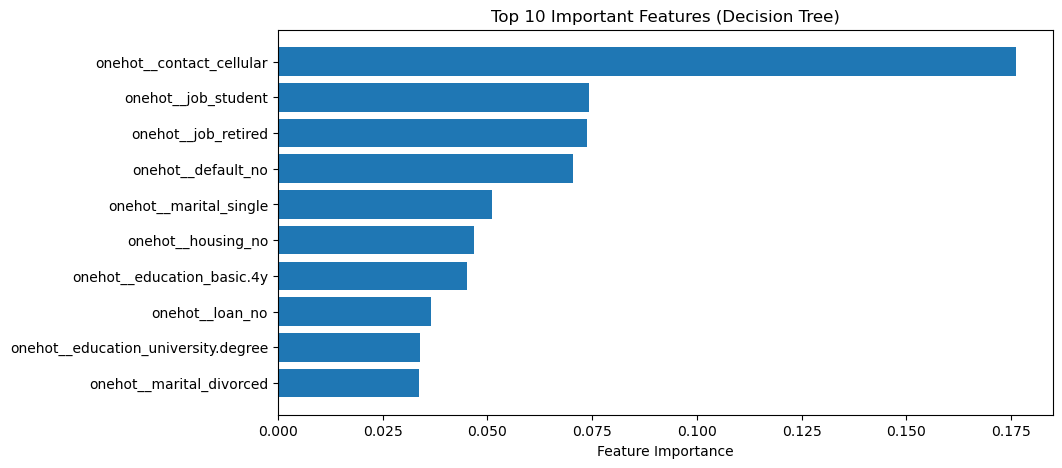

In [137]:
# Get feature importance vals from Decision Tree
feature_importances = tree_pipeline.named_steps['classifier'].feature_importances_
feature_names = column_trans.get_feature_names_out()

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10,5))
plt.barh(range(len(sorted_indices[:10])), feature_importances[sorted_indices[:10]], align='center')
plt.yticks(range(len(sorted_indices[:10])), np.array(feature_names)[sorted_indices[:10]])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features (Decision Tree)')
plt.gca().invert_yaxis()
plt.show()

In [139]:
print(X_train.dtypes)

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
dtype: object


In [149]:
if any(X_train.dtypes == 'object'):
    print("Warning: X_train has catergorical variables. Convert before fitting.")

In [144]:
# Categorical/Numerical features
categorical_features = list(X_train.select_dtypes(include=['object']).columns)
numerical_features = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

# Transformer
column_trans = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

# Transform
X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test)

print(f"Transformed X_train shape: {X_train_encoded.shape}")
print(f"Transformed X_test shape: {X_test_encoded.shape}")

Transformed X_train shape: (32950, 35)
Transformed X_test shape: (8238, 35)


In [145]:
# Manually tune Decision Tree after encoding
dt_params = [
    {'max_depth': 5, 'min_samples_split': 5},
    {'max_depth': 10, 'min_samples_split': 10},
    {'max_depth': None, 'min_samples_split': 2}
]

best_tree_acc = 0
best_tree_model = None

for params in dt_params:
    dtc = DecisionTreeClassifier(**params)
    dtc.fit(X_train_encoded, y_train)  # Now using encoded training data
    test_acc = dtc.score(X_test_encoded, y_test)

    print(f"Params: {params} | Test Accuracy: {round(test_acc, 6)}")

    if test_acc > best_tree_acc:
        best_tree_acc = test_acc
        best_tree_model = dtc

print("\nBest Decision Tree Model:", best_tree_model.get_params())
print("Best Test Accuracy:", round(best_tree_acc, 6))

Params: {'max_depth': 5, 'min_samples_split': 5} | Test Accuracy: 0.886259
Params: {'max_depth': 10, 'min_samples_split': 10} | Test Accuracy: 0.883952
Params: {'max_depth': None, 'min_samples_split': 2} | Test Accuracy: 0.881767

Best Decision Tree Model: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Best Test Accuracy: 0.886259


In [ ]:
# I would like to display the results in a table for an easier summary about model performance.

# Store Results
dt_comparison = pd.DataFrame({
    'Hyperparameters': [
        "{'max_depth': 5, 'min_samples_split': 5}",
        "{'max_depth': 10, 'min_samples_split': 10}",
        "{'max_depth': None, 'min_samples_split': 2}"
    ],
    'Test Accuracy': [0.886259, 0.883952, 0.881767],
    'Interpretation': [
        "Best-performing model (balanced generalization)",
        "Slightly lower accuracy, suggesting overfitting starts",
        "Overfitting - model too complex, learns noise instead of patterns"
    ]
})

# Show table
print(dt_comparison)

                               Hyperparameters  Test Accuracy  \
0     {'max_depth': 5, 'min_samples_split': 5}       0.886259   
1   {'max_depth': 10, 'min_samples_split': 10}       0.883952   
2  {'max_depth': None, 'min_samples_split': 2}       0.881767   

                                      Interpretation  
0    Best-performing model (balanced generalization)  
1  Slightly lower accuracy, suggesting overfittin...  
2  Overfitting - model too complex, learns noise ...  


##### Questions